## **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **STEP 1: Attribute Information**

## **1.1 Dataset feature name and details**

1. Name : Name of the Restaurants

2. Links : URL Links of the Restaurants

3. Cost : Per person estimated Cost of the dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by the Restaurants

6. Timings : Timings of the restaurants

## **2.2 Review dataset name and details**


1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **STEP 2: Import the required libraries and dataset**

In [326]:
#importing the required libraries 
import numpy as np
import pandas as pd
from numpy import math,unique
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [327]:
#Mount of the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [328]:
#Import the dataset
metadata_df = pd.read_csv('/content/drive/My Drive/Almabetter/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/My Drive/Almabetter/Zomato Restaurant Clustering and Sentiment Analysis/Zomato Restaurant reviews.csv')

# **STEP 3: Data Inspection**

## **3.1 Data Inspection on Metadata**

In [329]:
#Let's check first few rows
metadata_df.head(5)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [330]:
#let's check info
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


We need to convert Cost column data type to float or integer.

In [331]:
#Shape of the dataset
metadata_df.shape

(105, 6)

We have 105 rows with 6 columns. That means we have only 105 restaurants for analysis and modeling.

In [332]:
#Let's print the unique values in each column
for i in metadata_df.columns:
  print(i,metadata_df[i].nunique())

Name 105
Links 105
Cost 29
Collections 42
Cuisines 92
Timings 77


We can see, 
except Name and Links column, all other columns have unique values.

##**3.2 Data Inspection on Reviews data**

In [333]:
#Let's check first few rows of the dataset
reviews_df.head(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [334]:
#Let's check the info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [335]:
#Shape of the dataset
reviews_df.shape

(10000, 7)

In [336]:
#Let's print the unique values in each column
for i in reviews_df.columns:
  print(i,reviews_df[i].nunique())

Restaurant 100
Reviewer 7446
Review 9364
Rating 10
Metadata 2477
Time 9782
Pictures 36


We can see Rating column have 10 unique values.

# **STEP 4: Data pre processing**

## **4.1 Metadata Dataframe**

In [337]:
# changing the data type of the cost function
metadata_df['Cost'] = metadata_df['Cost'].str.replace(",","").astype('int64')

In [338]:
#Let's drop the links and timings column. We don't get any meaningful insights from these columns
metadata_df.drop(['Links','Timings'],axis=1,inplace=True)

In [339]:
#We have 2 different dataframes in which Name and Restaurant columns are common. We will rename Name column to Restaurant column as per reviews df
metadata_df.rename(columns={'Name':'Restaurant'},inplace=True)

In [340]:
#Let's check once again
metadata_df.head()

,Restaurant,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


##**4.2 Reviews dataframe** 

In [341]:
#Let's check which are those ten unique values and it's value count in the rating column
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

From the above, We can observe that Like is there in Rating. Which doesn't mean to be rating 

In [342]:
# 'like' observation first by nan values ans then by mean of the feature 
reviews_df.loc[reviews_df['Rating'] == 'Like'] = np.nan
reviews_df['Rating'] = reviews_df['Rating'].astype('float64')
print(reviews_df['Rating'].mean())

3.601044071880333


In [343]:
# since the mean is 3.601 we will assume it as 3.5 because we can see in rating column every value is rounded off.
reviews_df['Rating'].fillna(3.5,inplace=True)

In [344]:
#Let's convert Time column to DateTime
import datetime
reviews_df['Time'] = pd.to_datetime(reviews_df['Time'])

In [345]:
#Let's check dataframe
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0.0


##**4.3 Function for Missing values**

We will create a function for both the dataframes to find missing values with percentage and data type.

In [346]:
#Let's define a function for percentage of missing values with it's datatype
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print ("The selected dataframe have " + str(df.shape[1]) + " columns and " + str(df.shape[0])+" rows","\n\n")
        return mz_table

### **4.3.1 Metadata dataframe**

In [347]:
#Let's find missing values of metadata dataframe
missing_values_table(metadata_df)

The selected dataframe have 4 columns and 105 rows 




,Missing Values,% of Total Values,Data Type
Collections,54,51.4,object
Restaurant,0,0.0,object
Cost,0,0.0,int64
Cuisines,0,0.0,object


We can see that collections column have 51.4% missing values. We can replace these values with "Unknown"

In [348]:
#Replacing null values with Unknown
metadata_df['Collections'].fillna('Unknown',inplace=True)

In [349]:


metadata_df.isna().sum()

Restaurant     0
Cost           0
Collections    0
Cuisines       0
dtype: int64

### **4.3.2 Reviews dataframe**

In [350]:
#Let's find missing values of reviews dataframe
missing_values_table(reviews_df)

The selected dataframe have 7 columns and 10000 rows 




,Missing Values,% of Total Values,Data Type
Review,46,0.5,object
Reviewer,39,0.4,object
Metadata,39,0.4,object
Time,39,0.4,datetime64[ns]
Restaurant,1,0.0,object
Pictures,1,0.0,float64
Rating,0,0.0,float64


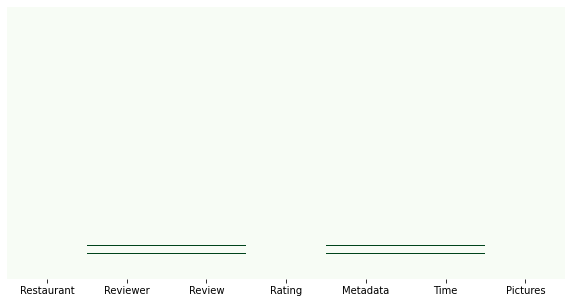

In [351]:
#Let's check on heatmap
plt.figure(figsize=(10,5))
sns.heatmap(reviews_df.isnull(),cbar=False,yticklabels=False,cmap='Greens');

We can see that most of the rows are null and value is less than 1%. We can drop those values.

In [352]:
#let's drop the missing values
reviews_df.dropna(inplace=True)

In [353]:
#Let's check once again
reviews_df.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

## **4.4 Function for treatment of Outliers**

We will create a function for the treatment of outliers

In [354]:
#let's define a function to treat the outliers wrt columns of a dataframe
def remove_outlier(df,column):
  
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() > -3]
  
  plt.figure(figsize=(15,6))
  
  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])

### **4.4.1 Metadata dataframe**

In [355]:
#let's do it for metadata dataframe
metadata_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost,105.0,861.428571,510.14973,150.0,500.0,700.0,1200.0,2800.0


We can see Only Cost column above, because outliers will be treated for numerical columns only. 

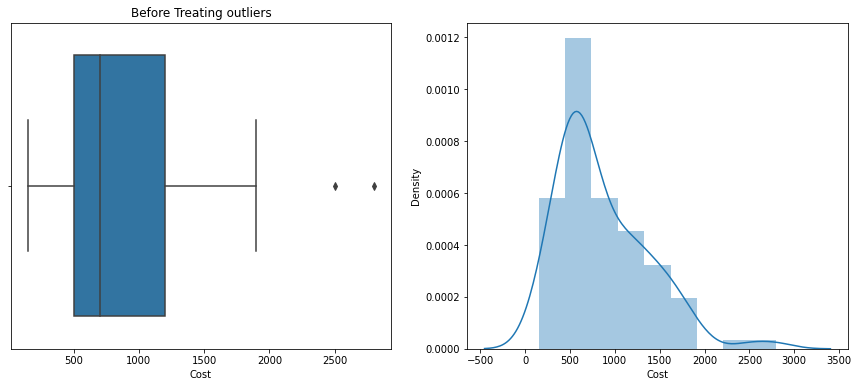

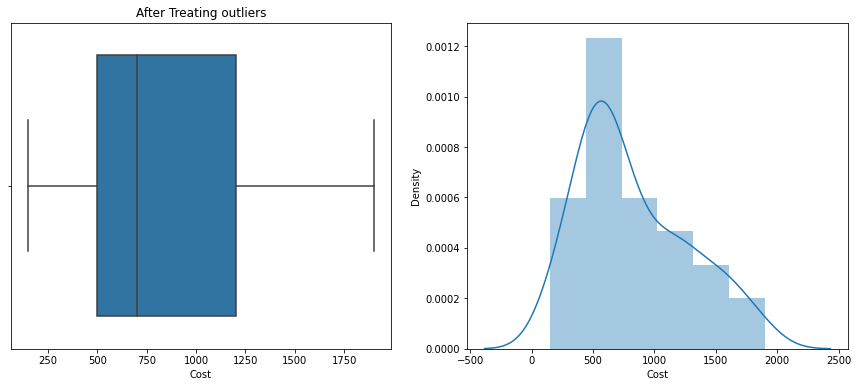

In [356]:
#The outlier will be treated for numerical column Cost and it will be according to the Z-score.
remove_outlier(metadata_df,'Cost')

#We can see the box plot and graph below before treating and after treating outliers

### **4.4.2 Reviews dataframe**

In [357]:
#let's do it for reviews dataframe
reviews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9954.0,3.600261,1.483573,1.0,3.0,4.0,5.0,5.0
Pictures,9954.0,0.751959,2.575819,0.0,0.0,0.0,0.0,64.0


Two columns are here. We have to do outlier treatment for 2 columns

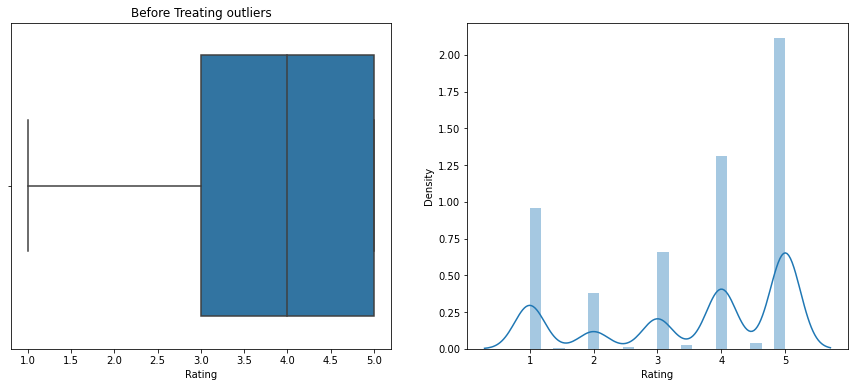

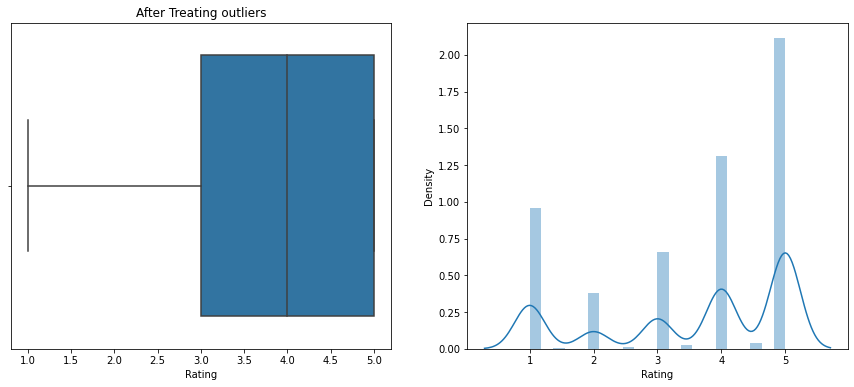

In [358]:
# First outlier treatment for rating column.
remove_outlier(reviews_df,'Rating')

#We can see result below before treating and after treating outliers

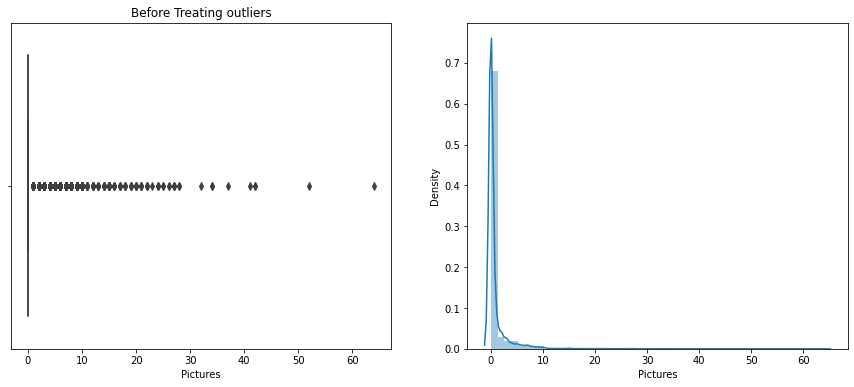

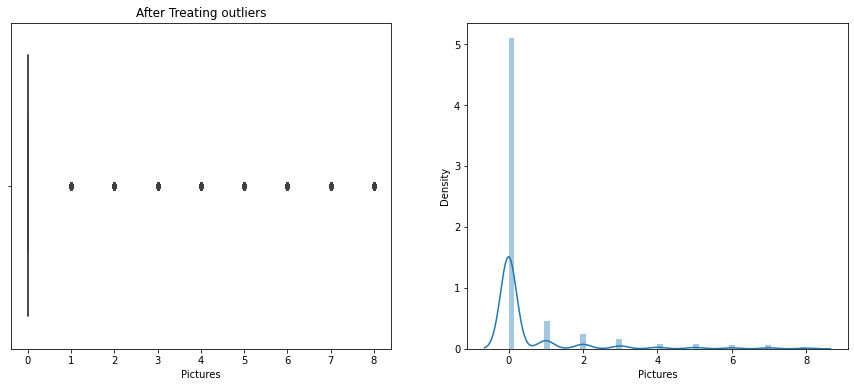

In [359]:
#outlier treatment for Pictures column
remove_outlier(reviews_df,'Pictures')

#**STEP 5: Data Cleaning and Preparation**

## **5.1 Metadata Dataframe**

In [360]:
metadata_df.head()

,Restaurant,Cost,Collections,Cuisines
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I..."
1,Paradise,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese"
2,Flechazo,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med..."


### **5.1.1 Collections column**


In [361]:
# let's remove stopwords 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import nltk
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [362]:
#remove punctuations
metadata_df['Collections'] = metadata_df['Collections'].str.replace('[^\w\s]','')

In [363]:
#remove stopwords
metadata_df['Collections'] = metadata_df['Collections'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))


### **5.1.2 Count vectorizer**

Countvectorizer is a method to convert text to numerical data.

In [364]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# creating a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using data
count_vectorizer.fit(metadata_df['Collections']) 
# collect the vocabulary items in the dictionary variable used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [365]:
#list to store vocab and count
vocab = []
count = []
#iterate through each vocab and count append the value to the respective list above
for key, value in dictionary:
  vocab.append(key)
  count.append(value)
#store the count in pandas dataframe with vocab as index
vocab_bef_stem = pd.Series(count,  index = vocab)
#store the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending = False)

### **5.1.3 Stemming**

It is the process of reducing the word to its word stem that affixes to suffixes and prefixes or to roots of words known as a lemma. In simple words stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem. For example – The words care, cared and caring lie under the same stem ‘care’.

In [366]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [367]:
metadata_df['Collections'] = metadata_df['Collections'].apply(stemming)

### **5.1.4 TF-IDF vectorizer**

TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

In [368]:
# let's create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(metadata_df['Collections'])   

# collect the vocabulary items in the dictionary used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [369]:
# Lists to store the vocab and counts
vocab = []
count = []
# Iterate through each vocab and count append the value to the respected list above
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# Store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# Sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)

We will create a count of all words as a 'Collections_length' of Collections column

In [370]:
#create a function to count the words
def length(text):   
  count = 0
  for i in range(len(text)):
    if text[i]==' ':
        count = count + 1
        
  return count+1

In [371]:
#to count the words from Collections column
metadata_df['Collections_length'] = metadata_df['Collections'].apply(length)

In [372]:
#let's verify the column
metadata_df.head()

,Restaurant,Cost,Collections,Cuisines,Collections_length
0,Beyond Flavours,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15
1,Paradise,800,hyderabad hottest,"Biryani, North Indian, Chinese",2
2,Flechazo,1300,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4
3,Shah Ghouse Hotel & Restaurant,800,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...",3
4,Over The Moon Brew Company,1200,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...",13


###**5.1.5 Cuisines column**

In [373]:
#We will consider the count of cuisines list as in Cuisines there are values seperated by comma
list_of_cuisins = metadata_df.Cuisines.str.split(', ')

metadata_df['Cuisines_list'] = pd.Series()

for i in range(len(metadata_df)):
  metadata_df['Cuisines_list'][i] = list_of_cuisins[i]

In [374]:
#Let's create a column 'Total_Cuisines' to count the cuisines severed by respective restaurant
metadata_df['Total Cuisines'] = metadata_df['Cuisines_list'].apply(lambda x : len(x))
metadata_df.drop(['Cuisines_list'],axis=1,inplace=True)

In [375]:
#To check the column
metadata_df.head(3)

,Restaurant,Cost,Collections,Cuisines,Collections_length,Total Cuisines
0,Beyond Flavours,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6
1,Paradise,800,hyderabad hottest,"Biryani, North Indian, Chinese",2,3
2,Flechazo,1300,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4,4


## **5.2 Reviews dataframe**

In [376]:
# the meta data column will be divided into 2 new columns since there are 2 types of info available
reviews_df['no_of_Reviews'],reviews_df['no_of_Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['no_of_Reviews'] = pd.to_numeric(reviews_df['no_of_Reviews'].str.split(' ').str[0])
reviews_df['no_of_Followers'] = pd.to_numeric(reviews_df['no_of_Followers'].str.split(' ').str[1])

In [377]:
# Data Type of new columns as float
reviews_df['no_of_Reviews'] = reviews_df['no_of_Reviews'].astype('float64')
reviews_df['no_of_Followers'] = reviews_df['no_of_Followers'].astype('float64')

In [378]:
# Let's extract the date and hour from the 'Time' column
reviews_df['Date'] = pd.DatetimeIndex(reviews_df['Time']).date
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [379]:
#Creating seperate column for day month and year
reviews_df['day'] = reviews_df['Date'].apply(lambda x: x.weekday())
reviews_df['month']=reviews_df['Date'].apply(lambda x: x.month)
reviews_df['year'] = reviews_df['Date'].apply(lambda x: x.year)

In [380]:
#mapping weekdays and months with integers.

#weekdays
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
reviews_df['day']=reviews_df['day'].map(week_day)
#months
month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
reviews_df['month']=reviews_df['month'].map(month_dict)

In [381]:
#Let's drop the metadata and time column
reviews_df = reviews_df.drop(['Metadata'], axis =1)
reviews_df = reviews_df.drop(['Time'], axis =1)

#**STEP 6: Exploratory Data Analysis**

## **6.1 Metadata Dataframe**

In [382]:
#Let's check the dataframe
metadata_df.head(5)

,Restaurant,Cost,Collections,Cuisines,Collections_length,Total Cuisines
0,Beyond Flavours,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6
1,Paradise,800,hyderabad hottest,"Biryani, North Indian, Chinese",2,3
2,Flechazo,1300,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4,4
3,Shah Ghouse Hotel & Restaurant,800,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...",3,5
4,Over The Moon Brew Company,1200,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...",13,5


### **6.1.1 Cuisines offered by restaurants**

In [383]:
list_of_cuisins = metadata_df.Cuisines.str.split(', ')

diff_cuisines = {} 
for names in list_of_cuisins: 
    for name in names:
        if (name in diff_cuisines):
            diff_cuisines[name]+=1
        else:  
            diff_cuisines[name]=1 
cuisines_df = pd.DataFrame(diff_cuisines.values(), diff_cuisines.keys(),columns = {'cuisines_counts'}).reset_index()
cuisines_df.sort_values(by = 'cuisines_counts',ascending = False,inplace = True) 
cuisines_df.rename(columns={'index':'cuisines_name', 'cuisines_name':'cuisines_counts'},inplace=True)

Text(0, 0.5, 'count of cuisines  in  all restaurants')

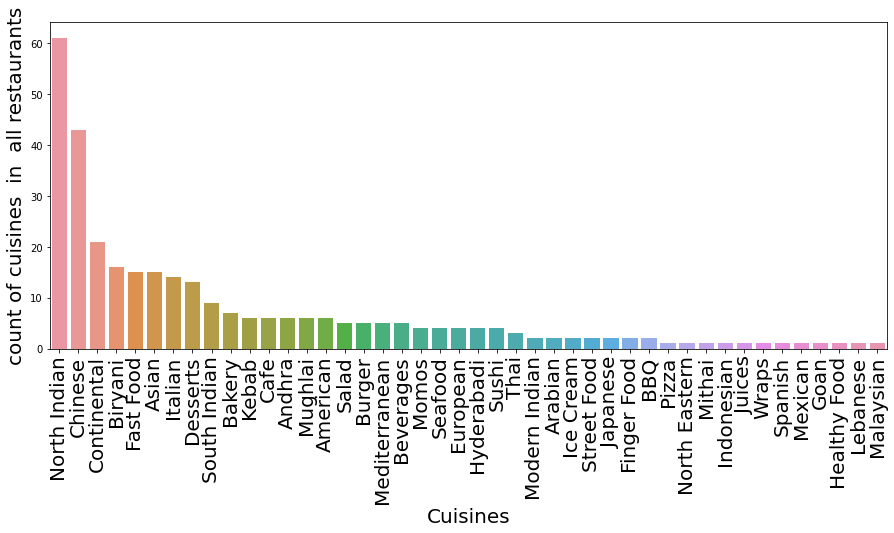

In [384]:
fig = plt.figure(figsize=[15,6])
sns.barplot(data=cuisines_df, x='cuisines_name', y= 'cuisines_counts')
plt.xlabel('Cuisines', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.ylabel('count of cuisines  in  all restaurants' , fontsize=20)

We can see that 'North indian' is the Popular Cuisine which is offered by almost many resturants. And 'Malaysian' is the rare cuisine.

###**6.1.2 Collections offered by restaurants**

In [385]:
list_of_collection = metadata_df.Collections.str.split(', ')
diff_coll = {} 
for names in list_of_collection: 
    for name in names:
        if (name in diff_coll):
            diff_coll[name]+=1
        else:  
            diff_coll[name]=1 
collections_df = pd.DataFrame(diff_coll.values(), diff_coll.keys(),columns = {'collection_counts'}).reset_index()
collections_df.sort_values(by = 'collection_counts',ascending = False,inplace = True) 
collections_df.rename(columns={'index':'collection_name', 'collection_name':'collection_counts'},inplace=True)
collections_df.head(10)
# since collections column has 51% null values.. we can drop it

,collection_name,collection_counts
7,unknown,54
6,food hygien rate restaur hyderabad,4
12,great buffet,2
40,new gold,2
1,hyderabad hottest,2
28,panasian delicaci,2
16,veggi friend,2
15,trend this week,2
32,sunday brunch great breakfast function venu ra...,1
27,function venu region favorit,1


Text(0, 0.5, 'count of collections')

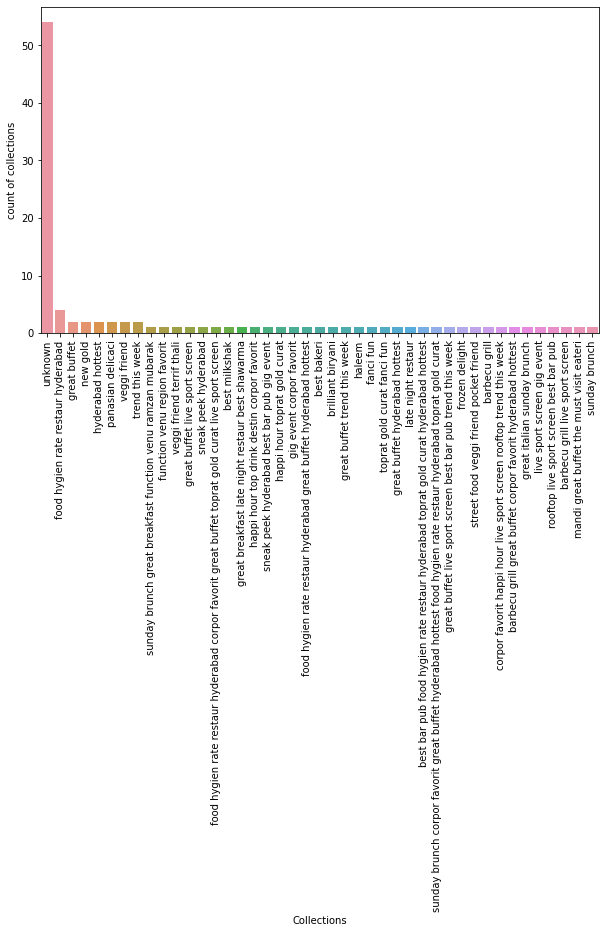

In [386]:
fig = plt.figure(figsize=[10,6])
sns.barplot(data=collections_df, x='collection_name', y= 'collection_counts')
plt.xlabel('Collections')
plt.xticks(rotation=90)
plt.ylabel('count of collections')

We can see that, the maximum collections are null values as we defined it unkonown earlier

### **6.1.3 Average Cost of each restaurant**

In [387]:
#Let's calculate average cost of each restaurant
cost_at_restaurants = metadata_df.groupby(['Restaurant'])['Cost'].mean().sort_values(ascending=False).reset_index()
cost_at_restaurants.sort_values(by = 'Cost',ascending = False,inplace = True)

cost_at_restaurants.head(10)

,Restaurant,Cost
0,Collage - Hyatt Hyderabad Gachibowli,2800.0
1,Feast - Sheraton Hyderabad Hotel,2500.0
2,10 Downing Street,1900.0
3,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
4,Cascade - Radisson Hyderabad Hitec City,1800.0
5,Zega - Sheraton Hyderabad Hotel,1750.0
6,Republic Of Noodles - Lemon Tree Hotel,1700.0
7,Mazzo - Marriott Executive Apartments,1700.0
8,Barbeque Nation,1600.0
9,Arena Eleven,1600.0


Text(0, 0.5, 'Cost')

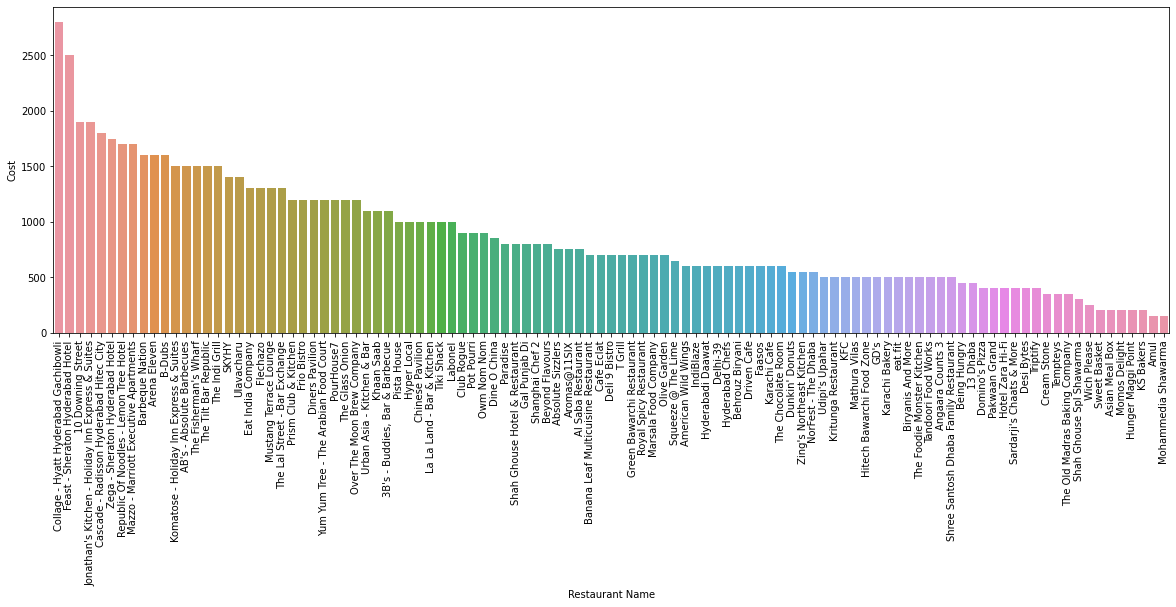

In [388]:
fig = plt.figure(figsize=[20,6])
sns.barplot(data=cost_at_restaurants, x='Restaurant', y= 'Cost')
plt.xlabel('Restaurant Name')
plt.xticks(rotation=90)
plt.ylabel('Cost')

We can see that Collage - Hyatt Hyderabad Gachibowli is the most expensive restaurant

### **6.1.5 Best Restaurant with ratings and price**

In [389]:
#Will check best restaurants
top_restaurants_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()

restaurants_price_rating = top_restaurants_rating.merge(cost_at_restaurants,on='Restaurant',how='inner')

In [390]:
restaurants_price_rating.head()

,Restaurant,Rating,Cost
0,AB's - Absolute Barbecues,4.88,1500.0
1,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
3,Paradise,4.70,800.0
4,Flechazo,4.66,1300.0


We can see that AB's - Absolute Barbecues	is the best restaurant with rating and price

###**6.1.6 Top 10 Most Expensive Restaurants**

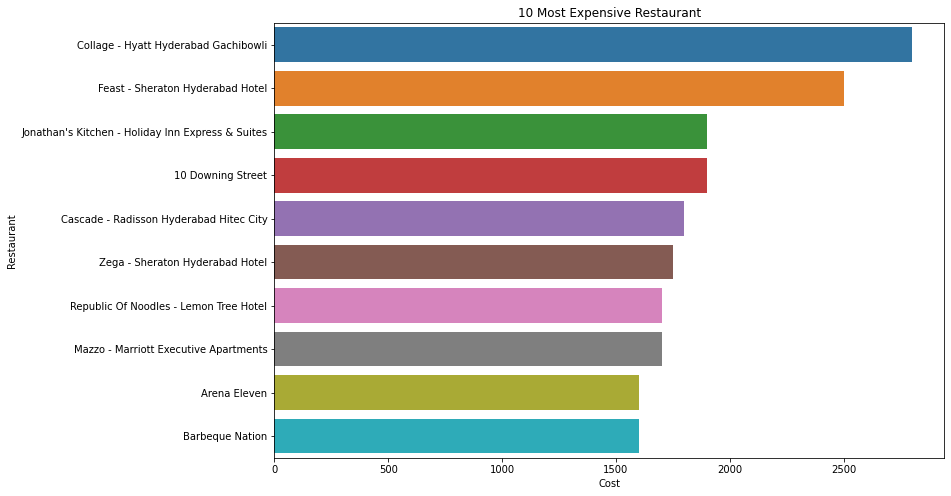

In [391]:
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='Cost', y='Restaurant', data=metadata_df.sort_values(ascending=False, by='Cost')[:10] )
plt.title('10 Most Expensive Restaurant')

plt.show()

###**6.1.7 Top 10 Cheapest Resturants**

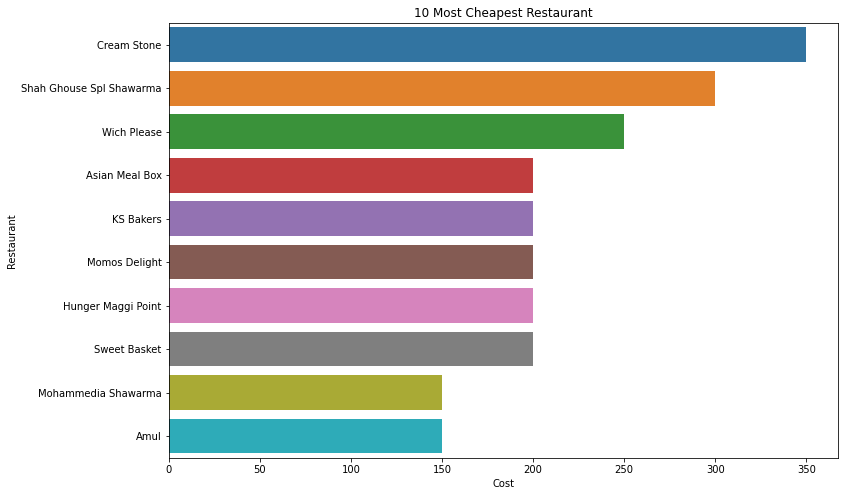

In [392]:
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='Cost', y='Restaurant', data=metadata_df.sort_values(ascending=False, by='Cost')[-10:] )
plt.title('10 Most Cheapest Restaurant')
plt.show()

##**6.2 Reviews dataframe**

In [393]:
#let's check reviews dataframe
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_Reviews,no_of_Followers,Date,Hour,day,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0.0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0.0,3.0,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0.0,2.0,3.0,2019-05-24,22,Friday,May,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0.0,1.0,1.0,2019-05-24,22,Friday,May,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0.0,3.0,2.0,2019-05-24,21,Friday,May,2019


### **6.2.1 Restaurants available wrt different Ratings**

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64


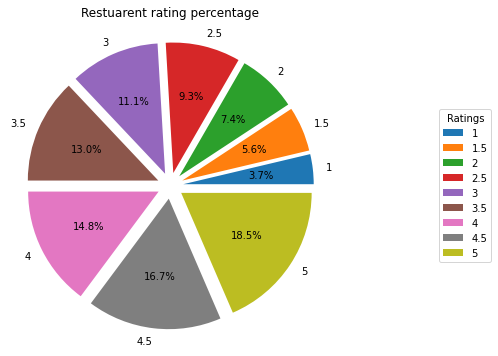

In [394]:
# Rating column visualization
print(reviews_df.Rating.value_counts())

y = np.unique(reviews_df['Rating'])
mylabels = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

plt.figure(figsize=(10,6))
plt.pie(y, labels = mylabels, autopct = '%1.1f%%', explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.legend(title = 'Ratings',bbox_to_anchor = (1.5,0.5), loc = "right")
plt.title("Restuarent rating percentage")
plt.show()

We can see that majority of the restuarants has >3 rating.

###**6.2.2 Average Ratings of Top 10 restaurants**

In [395]:
#average rating of restaurants
top_restaurants_rating = reviews_df.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
top_restaurants_rating

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.880
1,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
3,Paradise,4.700
4,Flechazo,4.660
...,...,...
95,Behrouz Biryani,2.825
96,Mathura Vilas,2.820
97,Pakwaan Grand,2.710
98,Asian Meal Box,2.580


Text(0.5, 1.0, 'Top 15 Restaurants')

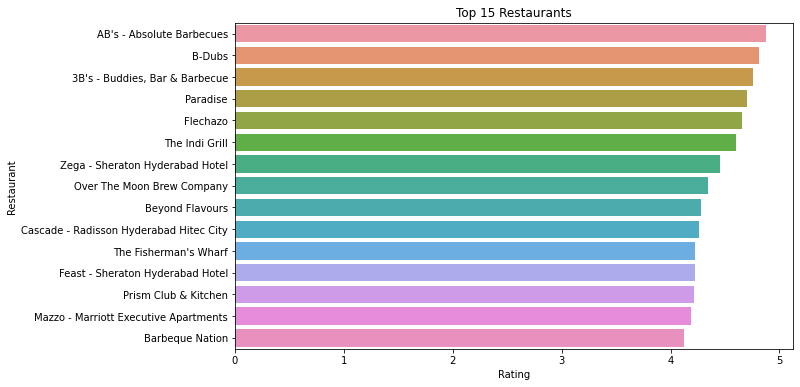

In [396]:
plt.figure(figsize=(10,6))
sns.barplot(data= top_restaurants_rating.head(15), x='Rating', y='Restaurant')
plt.title('Top 15 Restaurants')

We can see that there are the top 15 resturants with very good rating (>3)

### **6.2.3 Sentiment rating of restuarant's Reviews**

In [397]:
reviews_eda = reviews_df.copy()

In [398]:
#creating a function sentiment_rating
def sentiment_rating(rating):
  # Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good) and 2.5, 3, 3.5 with 0.5 (average)
  if(rating == 1 or rating == 1.5 or rating == 2):
    bad = 0
    return bad
  elif(rating == 2.5 or rating == 3 or rating == 3.5):
    average = 0.5
    return average
  elif(rating == 4 or rating == 4.5 or rating == 5):
    good = 1
    return good

#applying above function
reviews_eda["rating_classification"] = reviews_eda["Rating"].apply(sentiment_rating)

In [399]:
#Making seperate the reviews as good, bad and average
good = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']
bad = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']
average = reviews_eda.loc[reviews_eda['rating_classification']==1,'Review']

#**STEP 7: Feature Engineering**


In [400]:
#let's check dataframe
metadata_df.head()

,Restaurant,Cost,Collections,Cuisines,Collections_length,Total Cuisines
0,Beyond Flavours,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6
1,Paradise,800,hyderabad hottest,"Biryani, North Indian, Chinese",2,3
2,Flechazo,1300,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4,4
3,Shah Ghouse Hotel & Restaurant,800,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...",3,5
4,Over The Moon Brew Company,1200,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...",13,5


In [401]:
#let's check dataframe
reviews_df.head()


,Restaurant,Reviewer,Review,Rating,Pictures,no_of_Reviews,no_of_Followers,Date,Hour,day,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0.0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0.0,3.0,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0.0,2.0,3.0,2019-05-24,22,Friday,May,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0.0,1.0,1.0,2019-05-24,22,Friday,May,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0.0,3.0,2.0,2019-05-24,21,Friday,May,2019


We will use one dataframe for clustering and other for sentiment analysis
For clustering, we will consider the metadata dataframe along with we will draw some meaningful informtion of the resturants like 'Rating', 'Number of followers' and 'Number of Reviews' from the other reviews dataframe.

### **7.1 Extracting 'rating'**

In [402]:
#top restaurant rating
top_restaurants_rating.rename(columns={'Name':'Restaurant'},inplace=True)

In [403]:
top_restaurants_rating.head()

,Restaurant,Rating
0,AB's - Absolute Barbecues,4.88
1,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
3,Paradise,4.70
4,Flechazo,4.66


In [404]:
DF_meta = metadata_df.merge(top_restaurants_rating,on='Restaurant',how='left')
DF_meta.rename(columns={'Rating':'Avg Rating'},inplace=True)
DF_meta.head(3)

,Restaurant,Cost,Collections,Cuisines,Collections_length,Total Cuisines,Avg Rating
0,Beyond Flavours,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6,4.28
1,Paradise,800,hyderabad hottest,"Biryani, North Indian, Chinese",2,3,4.70
2,Flechazo,1300,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4,4,4.66


### **7.2 Extracting 'number of reviews' and 'number of followers'**

In [405]:
#to extract no. of reviews and number of followers
Total_followers = pd.DataFrame(reviews_df.groupby(['Restaurant'])['no_of_Followers'].sum().reset_index())
Total_reviews = pd.DataFrame(reviews_df.groupby(['Restaurant'])['no_of_Reviews'].sum().reset_index())

In [406]:
DF_meta = DF_meta.merge(Total_reviews,on='Restaurant',how='left')
DF_meta = DF_meta.merge(Total_followers,on='Restaurant',how='left')

In [407]:
DF_meta.head()

,Restaurant,Cost,Collections,Cuisines,Collections_length,Total Cuisines,Avg Rating,no_of_Reviews,no_of_Followers
0,Beyond Flavours,800,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I...",15,6,4.28,752.0,10061.0
1,Paradise,800,hyderabad hottest,"Biryani, North Indian, Chinese",2,3,4.70,252.0,798.0
2,Flechazo,1300,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts",4,4,4.66,667.0,2748.0
3,Shah Ghouse Hotel & Restaurant,800,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever...",3,5,3.21,1433.0,11843.0
4,Over The Moon Brew Company,1200,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med...",13,5,4.34,1831.0,7010.0


We will consider the two dataframes from here onwards. first one contains only string variables and other with numeric variables.

Let's see it below

### **7.3 Dataframe with string variables**

In [408]:
text_DF = DF_meta[['Restaurant','Collections','Cuisines']]

In [409]:
text_DF.head()

,Restaurant,Collections,Cuisines
0,Beyond Flavours,food hygien rate restaur hyderabad corpor favo...,"Chinese, Continental, Kebab, European, South I..."
1,Paradise,hyderabad hottest,"Biryani, North Indian, Chinese"
2,Flechazo,great buffet hyderabad hottest,"Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,late night restaur,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,Over The Moon Brew Company,best bar pub food hygien rate restaur hyderaba...,"Asian, Continental, North Indian, Chinese, Med..."


### **7.4 Dataframe with numeric variables**

In [410]:
#Restaurant details with only numeric columns..
numeric_DF = DF_meta[['Cost','Collections_length','Total Cuisines','Avg Rating','no_of_Reviews','no_of_Followers']]
numeric_DF.sort_values(by=['Cost','Avg Rating'],ascending=[False,False],inplace=True,ignore_index=True)

In [411]:
numeric_DF.head()

,Cost,Collections_length,Total Cuisines,Avg Rating,no_of_Reviews,no_of_Followers
0,2800,2,5,3.410,4764.0,17826.0
1,2500,8,4,4.220,2341.0,17595.0
2,1900,3,3,3.800,3990.0,24573.0
3,1900,4,5,3.535,2927.0,26995.0
4,1800,1,4,4.260,4444.0,31644.0


In [412]:
#shape of numeric dataframe
numeric_DF.shape

(105, 6)

### **7.5 Handling missing values and treating the outliers in dataframe with Numerical variables.**

Missing values

In [413]:
#let's check for null or missing values
numeric_DF.isna().sum()

Cost                  0
Collections_length    0
Total Cuisines        0
Avg Rating            5
no_of_Reviews         5
no_of_Followers       5
dtype: int64

In [414]:
#KNN to find the missing values

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

#Let's define the scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Impute the missing values with KNN if any
numeric_DF['Avg Rating'] = imputer.fit_transform((numeric_DF['Avg Rating'].values.reshape(-1,1)))
numeric_DF['no_of_Reviews'] = imputer.fit_transform((numeric_DF['no_of_Reviews'].values.reshape(-1,1)))
numeric_DF['no_of_Followers'] = imputer.fit_transform((numeric_DF['no_of_Followers'].values.reshape(-1,1)))

In [415]:
#numeric dataframe describe method
numeric_DF.describe()

,Cost,Collections_length,Total Cuisines,Avg Rating,no_of_Reviews,no_of_Followers
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,861.428571,2.895238,2.980952,3.601891,2389.750000,16237.200000
std,510.149730,3.109921,1.208790,0.495736,1326.382018,10576.707229
min,150.000000,1.000000,1.000000,2.400000,252.000000,562.000000
25%,500.000000,1.000000,2.000000,3.260000,1525.000000,9355.000000
50%,700.000000,1.000000,3.000000,3.601891,2341.000000,15137.000000
75%,1200.000000,4.000000,4.000000,3.845000,3058.000000,21713.000000
max,2800.000000,16.000000,6.000000,4.880000,6628.000000,51068.000000


In [416]:
#let's verify null values
numeric_DF.isna().sum()

Cost                  0
Collections_length    0
Total Cuisines        0
Avg Rating            0
no_of_Reviews         0
no_of_Followers       0
dtype: int64

In [417]:
numeric_DF.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost,105.0,861.428571,510.149730,150.0,500.00,700.000000,1200.000,2800.00
Collections_length,105.0,2.895238,3.109921,1.0,1.00,1.000000,4.000,16.00
Total Cuisines,105.0,2.980952,1.208790,1.0,2.00,3.000000,4.000,6.00
Avg Rating,105.0,3.601891,0.495736,2.4,3.26,3.601891,3.845,4.88
no_of_Reviews,105.0,2389.750000,1326.382018,252.0,1525.00,2341.000000,3058.000,6628.00
no_of_Followers,105.0,16237.200000,10576.707229,562.0,9355.00,15137.000000,21713.000,51068.00


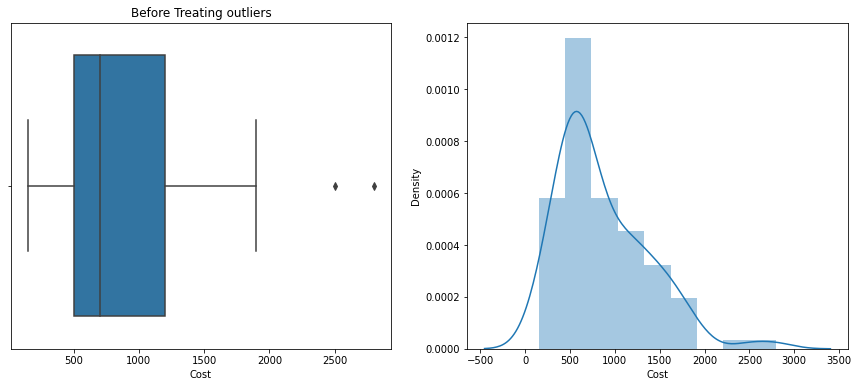

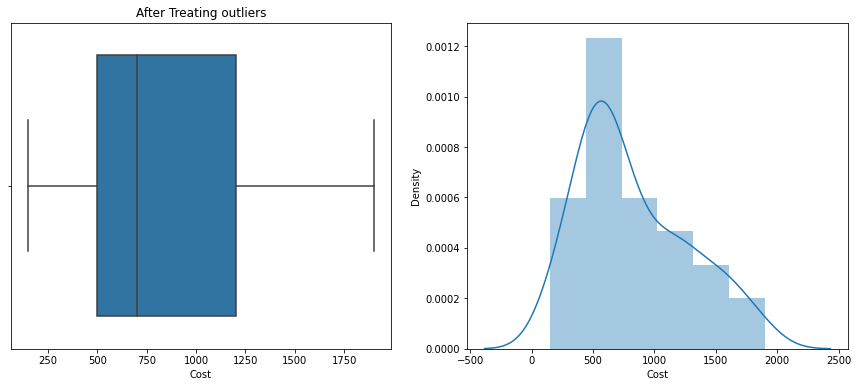

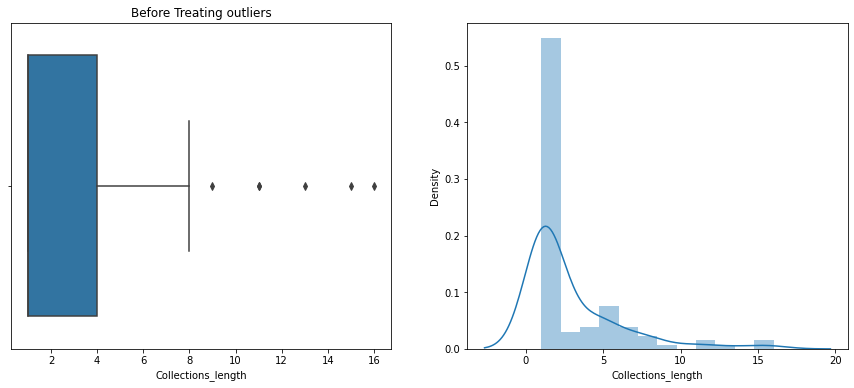

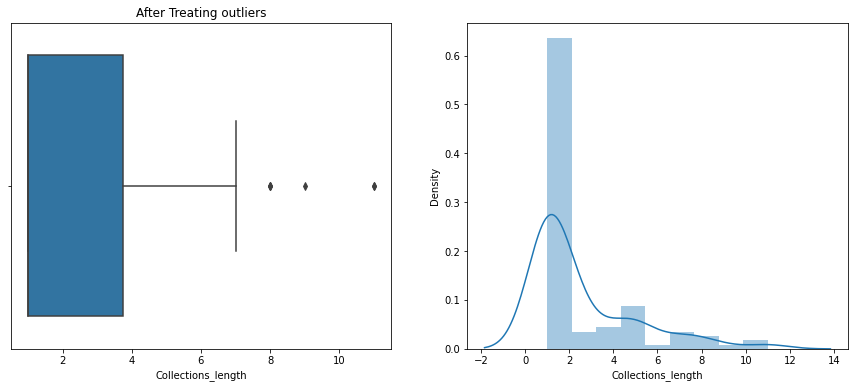

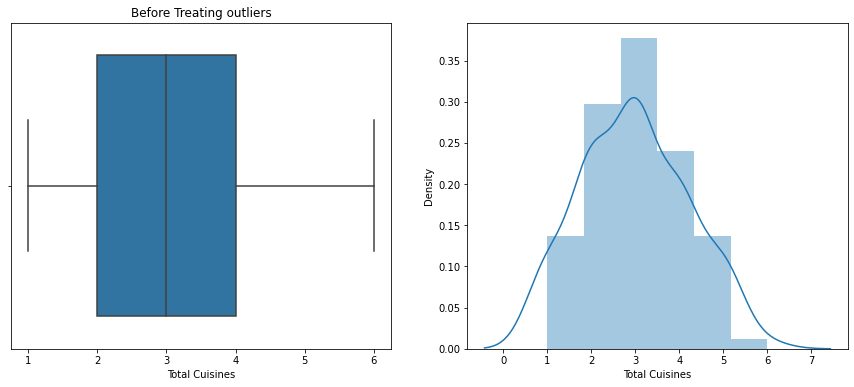

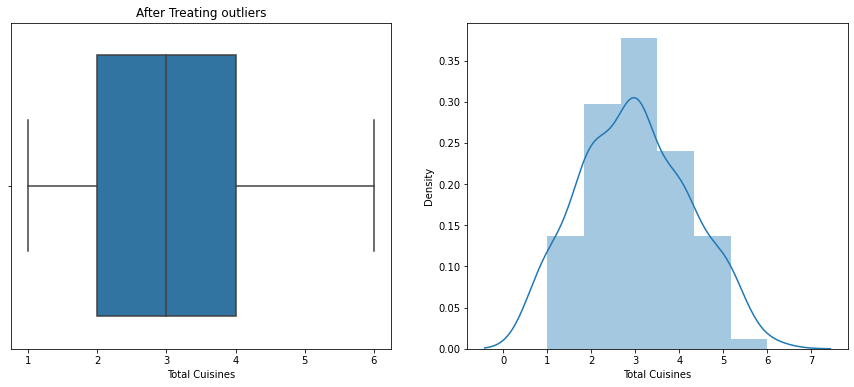

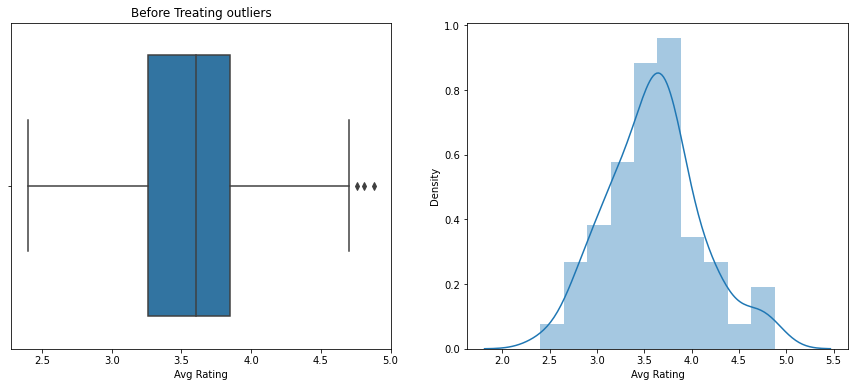

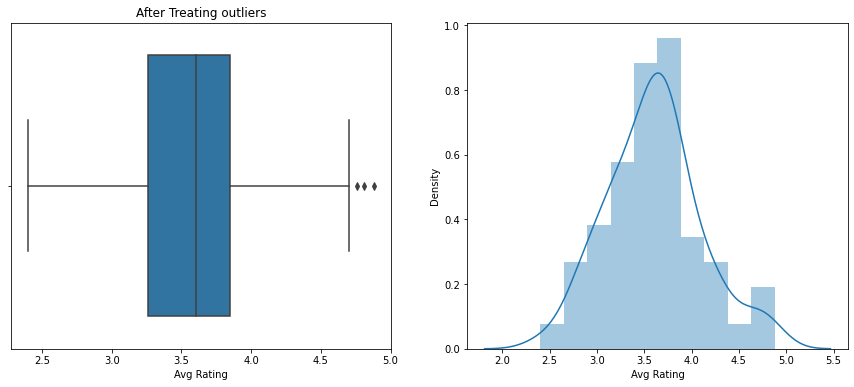

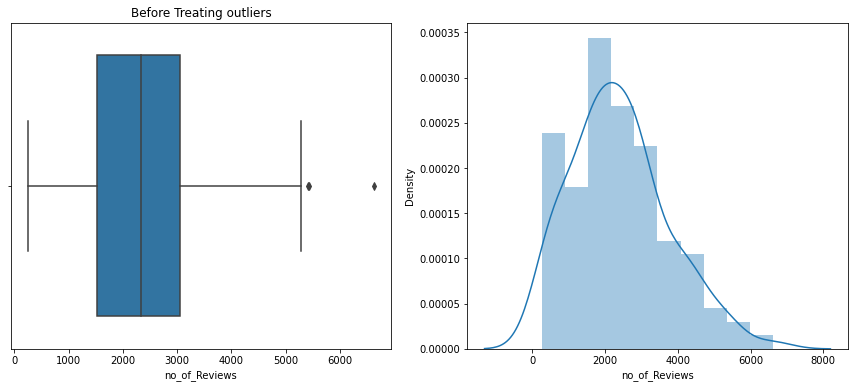

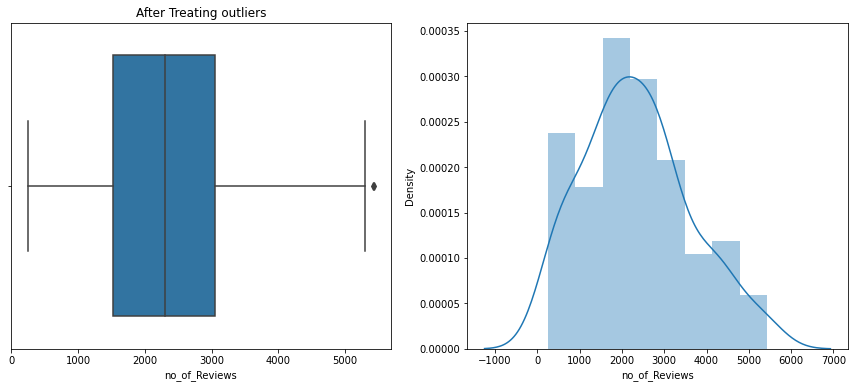

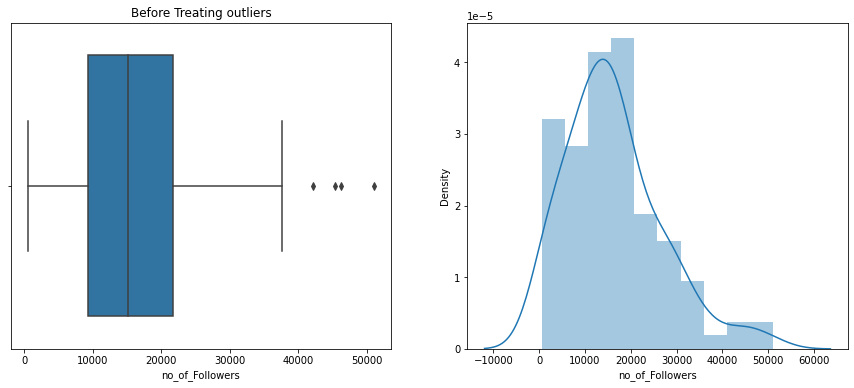

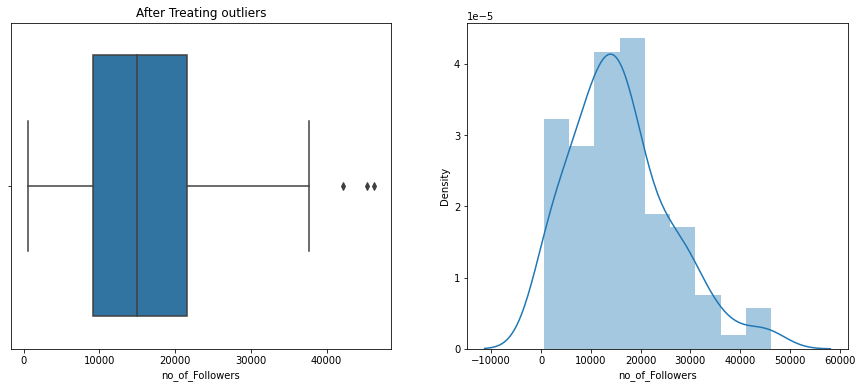

In [418]:
#to check outliers
for i in numeric_DF.columns:
  remove_outlier(numeric_DF,i)

In [419]:
numeric_DF.head()

,Cost,Collections_length,Total Cuisines,Avg Rating,no_of_Reviews,no_of_Followers
0,2800,2,5,3.410,4764.0,17826.0
1,2500,8,4,4.220,2341.0,17595.0
2,1900,3,3,3.800,3990.0,24573.0
3,1900,4,5,3.535,2927.0,26995.0
4,1800,1,4,4.260,4444.0,31644.0


So, This will be our final dataframe.

#**STEP 8: One hot encoding**

In [420]:
numeric_DF = pd.concat([numeric_DF,pd.DataFrame(columns=list(diff_cuisines.keys()))])

In [421]:
numeric_DF.head()

,Cost,Collections_length,Total Cuisines,Avg Rating,no_of_Reviews,no_of_Followers,Chinese,Continental,Kebab,European,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,2800.0,2.0,5.0,3.410,4764.0,17826.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,8.0,4.0,4.220,2341.0,17595.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900.0,3.0,3.0,3.800,3990.0,24573.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900.0,4.0,5.0,3.535,2927.0,26995.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1800.0,1.0,4.0,4.260,4444.0,31644.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
#We will iterate for every row in the dataframe
for i, row in numeric_DF.iterrows():
  # We will interate over new columns for every row
  for column in list(numeric_DF.columns):
      if column not in ['Cost','Collections_length','Total Cuisines','Avg Rating','no_of_Reviews','no_of_Followers']:
        # will check if the column is in the list of cuisines available for that row
        if column in text_DF['Cuisines']:
          #then assign it as 1 else 0
          numeric_DF.loc[i,column] = 1
        else:
          numeric_DF.loc[i,column] = 0

In [423]:
numeric_DF.head()

,Cost,Collections_length,Total Cuisines,Avg Rating,no_of_Reviews,no_of_Followers,Chinese,Continental,Kebab,European,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,2800.0,2.0,5.0,3.410,4764.0,17826.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,8.0,4.0,4.220,2341.0,17595.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1900.0,3.0,3.0,3.800,3990.0,24573.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1900.0,4.0,5.0,3.535,2927.0,26995.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1800.0,1.0,4.0,4.260,4444.0,31644.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**STEP 9: Feature Scaling**

In [424]:
#Min max scaler for only numeric columns


column_names = list(numeric_DF.columns)
# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(numeric_DF)
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(numeric_DF))
DF_scaled.columns = column_names

In [425]:
DF_scaled.head()

,Cost,Collections_length,Total Cuisines,Avg Rating,no_of_Reviews,no_of_Followers,Chinese,Continental,Kebab,European,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,1.000000,0.066667,0.8,0.407258,0.707654,0.341821,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.886792,0.466667,0.6,0.733871,0.327635,0.337247,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.660377,0.133333,0.4,0.564516,0.586261,0.475409,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.660377,0.200000,0.8,0.457661,0.419542,0.523364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.622642,0.000000,0.6,0.750000,0.657465,0.615412,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
#will create a copy
Df = DF_scaled.copy()

#**STEP 10: Clustering**
Clustering or cluster analysis is a machine learning technique, which groups the unlabelled dataset. It can be defined as "A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group."

It does it by finding some similar patterns in the unlabelled dataset such as shape, size, color, behavior, etc., and divides them as per the presence and absence of those similar patterns.

It is an unsupervised learning method, hence no supervision is provided to the algorithm, and it deals with the unlabeled dataset.

After applying this clustering technique, each cluster or group is provided with a cluster-ID. ML system can use this id to simplify the processing of large and complex datasets.

In [427]:
new_df = DF_scaled.copy()
new_df.pop('Cost')
new_df.insert(3,'Cost',DF_scaled['Cost'])

In [428]:
new_df.head(5)

,Collections_length,Total Cuisines,Avg Rating,Cost,no_of_Reviews,no_of_Followers,Chinese,Continental,Kebab,European,...,Spanish,Wraps,Thai,Indonesian,Modern Indian,Momos,Pizza,North Eastern,Mithai,Malaysian
0,0.066667,0.8,0.407258,1.000000,0.707654,0.341821,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.466667,0.6,0.733871,0.886792,0.327635,0.337247,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.133333,0.4,0.564516,0.660377,0.586261,0.475409,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.200000,0.8,0.457661,0.660377,0.419542,0.523364,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.6,0.750000,0.622642,0.657465,0.615412,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
DF_scaled = new_df.copy()

In [430]:
#Dataframe for the Silhouette score
Y_predicted_clusters = DF_scaled.copy()
silhouette_scores_df = pd.DataFrame(columns = ['Model','Optimal_clusters','Silhouette_score'])

##**10.1 Hierarchial Clustering**

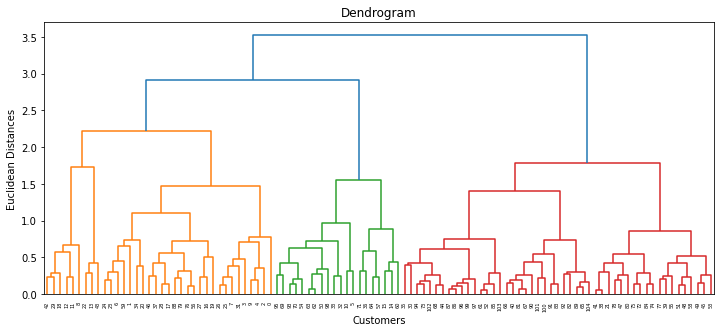

In [431]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(DF_scaled, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

plt.show()

###**10.1.1. Agglomerative Hierarchial Clustering**

Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). 
A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. 
Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

In [432]:
X = DF_scaled[['Collections_length','Total Cuisines']]

In [433]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(X)
    score = silhouette_score(X, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4303774765526247
For n_clusters = 3, silhouette score is 0.4781070221479517
For n_clusters = 4, silhouette score is 0.520110073175652
For n_clusters = 5, silhouette score is 0.537476818350871
For n_clusters = 6, silhouette score is 0.5610205051232735
For n_clusters = 7, silhouette score is 0.6536398767929279
For n_clusters = 8, silhouette score is 0.6788019764930983
For n_clusters = 9, silhouette score is 0.7292998187780692
For n_clusters = 10, silhouette score is 0.7447442592466849
For n_clusters = 11, silhouette score is 0.7413148473619553
For n_clusters = 12, silhouette score is 0.7368246568630357
For n_clusters = 13, silhouette score is 0.738890363131906
For n_clusters = 14, silhouette score is 0.7445799003231872
For n_clusters = 15, silhouette score is 0.7496984039809563


In [434]:
n_clusters = 7

#fit predict kmeans on  clusters
hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
score = silhouette_score(X, y_hc)

Y_predicted_clusters["Label_AggClu"] = y_hc

silhouette_scores_df.loc[1] = ['Agglomerative Clustering',n_clusters,score]

Text(0.5, 1.0, 'Total collections vs total no of cuisines')

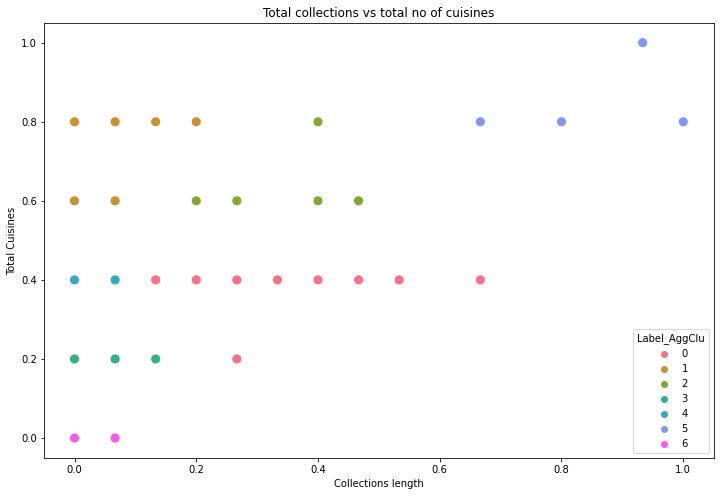

In [435]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_AggClu", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

##**10.2 DBSCAN clustering**
K-Means clustering may cluster loosely related observations together. Every observation becomes a part of some cluster eventually, even if the observations are scattered far away in the vector space. Since clusters depend on the mean value of cluster elements, each data point plays a role in forming the clusters. A slight change in data points might affect the clustering outcome. This problem is greatly reduced in DBSCAN due to the way clusters are formed. This is usually not a big problem unless we come across some odd shape data.

Another challenge with k-means is that you need to specify the number of clusters (“k”) in order to use it. Much of the time, we won’t know what a reasonable k value is a priori.

What’s nice about DBSCAN is that you don’t have to specify the number of clusters to use it. All you need is a function to calculate the distance between values and some guidance for what amount of distance is considered “close”. DBSCAN also produces more reasonable results than k-means across a variety of different distributions

In [436]:
# dbscan clustering alogrithm

from sklearn.cluster import DBSCAN

# let's define the model
model = DBSCAN(eps=0.15, min_samples=5)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
score = silhouette_score(X, yhat)
#print(score)
Y_predicted_clusters["Label_DBscan"] = yhat
silhouette_scores_df.loc[2] = ['DBscan Clustering',len(clusters),score]

Text(0.5, 1.0, 'Total collections vs total no of cuisines')

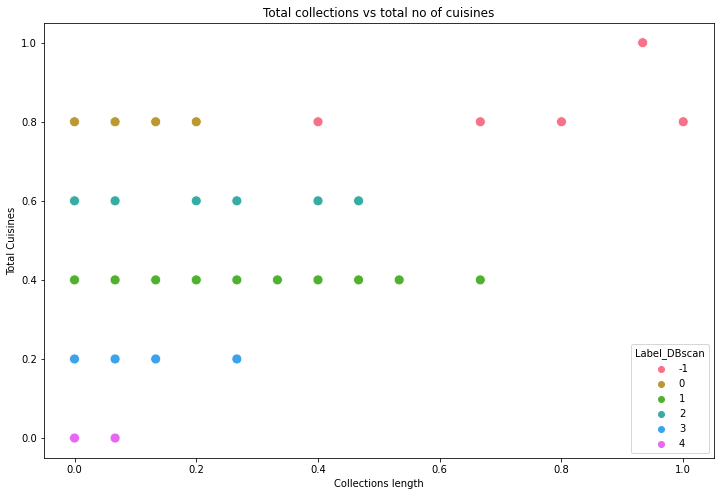

In [437]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",len(clusters)),hue="Label_DBscan", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

##**10.3 K Means Clustering**
K-Means Clustering is an Unsupervised Learning algorithm
, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.

In [438]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import preprocessing

#We are considering oly 2 features which are giving good results.
features_cluster=['Collections_length','Total Cuisines']
X = DF_scaled[features_cluster]

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4633075558230651
For n_clusters = 3, silhouette score is 0.5005082570036603
For n_clusters = 4, silhouette score is 0.5230153589914093
For n_clusters = 5, silhouette score is 0.5466293530449327
For n_clusters = 6, silhouette score is 0.6233154235361843
For n_clusters = 7, silhouette score is 0.6456930171971019
For n_clusters = 8, silhouette score is 0.6817294757347382
For n_clusters = 9, silhouette score is 0.728777892911993
For n_clusters = 10, silhouette score is 0.7467669666606522
For n_clusters = 11, silhouette score is 0.7383710233228206
For n_clusters = 12, silhouette score is 0.7294349947488711
For n_clusters = 13, silhouette score is 0.738890363131906
For n_clusters = 14, silhouette score is 0.7637763923464926
For n_clusters = 15, silhouette score is 0.7432895509927684


###**10.3.1 Elbow method**

The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

In [439]:
#Within Cluster Sum of Squared Errors for different values of k
#we will take first two variables only
wcss=[]
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

Text(0, 0.5, 'WCSS')

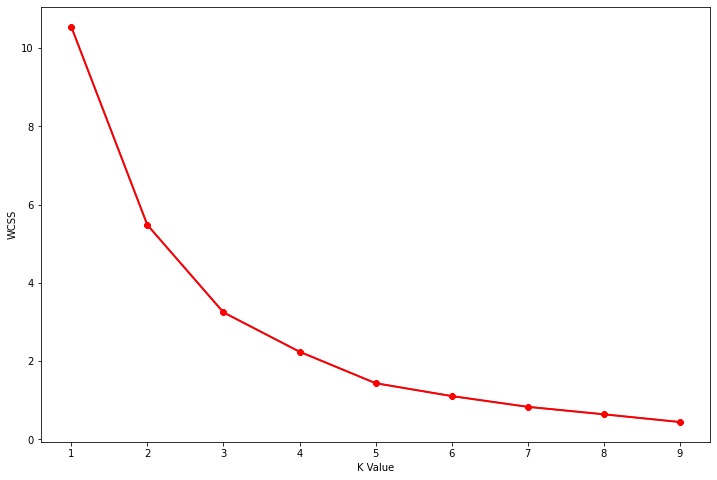

In [440]:
#let's see the elbow curve
plt.plot(range(1,10),wcss)
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")

In [441]:
n_clusters = 7

#fit predict kmeans on  clusters
model1 = KMeans(n_clusters=7,random_state= 42)
pred_1 = model1.fit_predict(X)
score = silhouette_score(X, pred_1)

Y_predicted_clusters["Label_Kmeans"] = pred_1

silhouette_scores_df.loc[3] = ['KMeans Clustering',len(clusters),score]

In [442]:
#let's chek df
silhouette_scores_df.head()

,Model,Optimal_clusters,Silhouette_score
1,Agglomerative Clustering,7,0.653640
2,DBscan Clustering,6,0.511593
3,KMeans Clustering,6,0.660759


Text(0.5, 1.0, 'Total collections vs total no of cuisines')

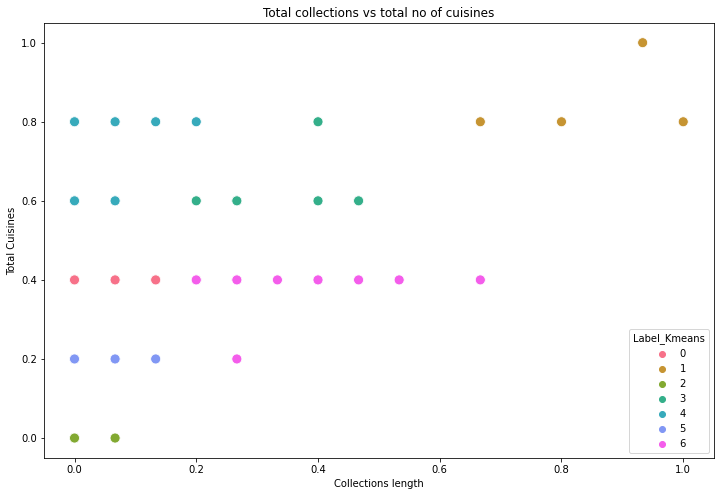

In [443]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_Kmeans", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

##**10.4 mini-batch k-means**
Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until convergence

In [444]:
# mini-batch k-means clustering

from sklearn.cluster import MiniBatchKMeans

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    model = MiniBatchKMeans(n_clusters=n_clusters)
    yhat = model.fit_predict(X)
    #clusters = unique(yhat)
    score = silhouette_score(X, yhat)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5070941642975836
For n_clusters = 3, silhouette score is 0.4877254920730758
For n_clusters = 4, silhouette score is 0.5147506466143951
For n_clusters = 5, silhouette score is 0.5452570220165679
For n_clusters = 6, silhouette score is 0.6233154235361843
For n_clusters = 7, silhouette score is 0.6149658407810501
For n_clusters = 8, silhouette score is 0.6817294757347382
For n_clusters = 9, silhouette score is 0.7218791237657975
For n_clusters = 10, silhouette score is 0.7359976944227944
For n_clusters = 11, silhouette score is 0.7433375547759223
For n_clusters = 12, silhouette score is 0.744376654555971
For n_clusters = 13, silhouette score is 0.741315955229604
For n_clusters = 14, silhouette score is 0.7725280995223849
For n_clusters = 15, silhouette score is 0.7903253222053486


In [445]:
n_clusters = 7
# mini batch kmeans clustering

from sklearn.cluster import DBSCAN

# define the model
model = MiniBatchKMeans(n_clusters=n_clusters)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
score = silhouette_score(X, yhat)
#print(score)
Y_predicted_clusters["Label_minik"] = yhat
silhouette_scores_df.loc[4] = ['mini batch k means',n_clusters,score]

Text(0.5, 1.0, 'Total collections vs total no of cuisines')

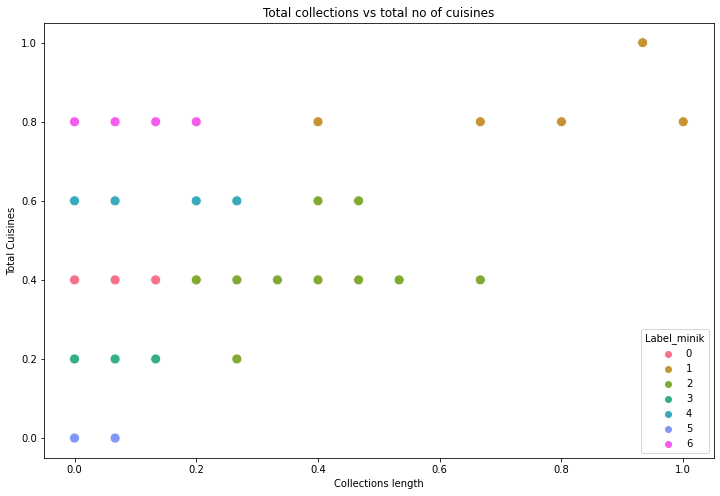

In [446]:
#Scatterplot of the clusters
#plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Collections_length',y = 'Total Cuisines',palette = sns.color_palette("husl",7),hue="Label_minik", legend='full',data = Y_predicted_clusters ,s = 100 )
plt.xlabel('Collections length')
plt.ylabel('Total Cuisines') 
plt.title('Total collections vs total no of cuisines')

In [ ]:
silhouette_scores_df

##**10.5 Validation**

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them. 
A variety of measures have been proposed in the literature for evaluating clustering results. The term clustering validation is used to design the procedure of evaluating the results of a clustering algorithm.

Silhouette score -
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.


Average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.

In [451]:
silhouette_scores_df.sort_values('Silhouette_score',ascending=False)

,Model,Optimal_clusters,Silhouette_score
3,KMeans Clustering,6,0.660759
1,Agglomerative Clustering,7,0.653640
4,mini batch k means,7,0.652973
2,DBscan Clustering,6,0.511593



#**STEP 11: Sentimental analysis**


In [ ]:
#let's check dataframe
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Pictures,no_of_Reviews,no_of_Followers,Date,Hour,day,month,year
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,0.0,1.0,2.0,2019-05-25,15,Saturday,May,2019
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,0.0,3.0,2.0,2019-05-25,14,Saturday,May,2019
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,0.0,2.0,3.0,2019-05-24,22,Friday,May,2019
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,0.0,1.0,1.0,2019-05-24,22,Friday,May,2019
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,0.0,3.0,2.0,2019-05-24,21,Friday,May,2019


In [ ]:
# Review and rating column for analysis
sentiment_df = reviews_df[['Review','Rating']]

In [ ]:
# cheking Null values
sentiment_df.isna().sum()

Review    0
Rating    0
dtype: int64

In [ ]:
sentiment_df['Review'][68]

"Second time being here it's really beyond imagination beyond taste and beyond flavours as well. Very courteous staff and very hospitile.\nTaste is good but the best part is presentation,,, it's really meeting the standard of a 5 star restaurant .\nVery impressed with Mr Ahmed , Pradeep and Mr Dipanajan who are very friendly and took care of us very well. Good job guys keep it up."

In [ ]:
#count the values
sentiment_df['Rating'].value_counts()

5.0    3826
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [ ]:
#shape of the dataset
sentiment_df.shape

(9954, 2)

## **11.1 Text preprocessing**
We have to remove

(1) Punctuations

(2) Emojis


(3) multiple spaces

(4)stop words and special characters
 

(5) \n present in review

(6) Numbers and ratings specified within the review

(7) need to use lemmatization

In [ ]:
# making lowercase of review column data
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head(3)

,Review,Rating
0,"the ambience was good, food was quite good . h...",5.0
1,ambience is too good for a pleasant evening. s...,5.0
2,a must try.. great food great ambience. thnx f...,5.0


In [ ]:
# cleaning the dataset
import re
import string

#function to remove emoji
def remove_Emoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# function to remove ratings along with \n
def remove_rating(rating):
  rating=re.sub(r'([0.-9.]+/+[0.-9.]+)','',rating) #using regx
  rating=re.sub(r'(\n+)','',rating) #removes \n
  return rating

#function to remove numbers 
def remove_number(x):
  output = re.sub(r'\d+[a-zA-Z0-9_.+-]+', '',x)
  output = re.sub(r'[a-zA-Z0-9_.+-]+\d', '',output)
  output = re.sub(r'\d+', '',output)
  return output

# function to remove punctuations and special characters
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return nopunc


#function to remove [] brackets ''' quotes 
def clean_text(text):
    '''remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r'[''""...]', '', text)
    return text


# to remove stop words
import spacy
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_spacy]))


#to remove multiple spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_Emoji(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_rating(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_number(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(text_process)
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:clean_text(x) )

In [ ]:
!pip install contractions
import contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 33.3 MB/s 
     |████████████████████████████████| 287 kB 75.3 MB/s 


In [ ]:
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

In [ ]:
#download small spacy model
import spacy

!python -m spacy download en_core_web_sm
spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

2022-09-11 09:31:13.761720: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 25.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#Lemmatization funtion
def lemmatization_(sentence):
    doc = nlp(sentence)
    l=list()
    for word in doc:
        
        l.append(word.lemma_)

    return ' '.join(l)

sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:lemmatization_(x))

In [ ]:

#Rarely used words and word count
word=' '.join(sentiment_df['Review']).split()
words_df = pd.Series(word)

In [ ]:
words_df

0         ambience
1             good
2             food
3             good
4         saturday
            ...   
258128       price
258129       value
258130       money
258131        fine
258132    ambience
Length: 258133, dtype: object

In [ ]:
sentiment_df['Review'][22]

'service good fast people polite behave manav pradeep good hope behave way'

In [ ]:
top_10_words = words_df.value_counts()[0:10]
least_10_words = words_df.value_counts(ascending=True)[0:10]

In [ ]:
least_10_words

uch            1
shewzwan       1
hinder         1
monis          1
inexpensive    1
chilkur        1
balaji         1
chefwe         1
succha         1
wetmust        1
dtype: int64

In [ ]:
#let's remove the words which are rarely used by creating function
def remove_rarely_used_words(review):
  review=" ".join([i for i in review.split() if len(i)>3])
  return review

sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x:remove_rarely_used_words(x))

In [ ]:
df = sentiment_df.copy()

In [ ]:
df.head()

,Review,Rating
0,ambience good food good saturday lunch cost ef...,5.0
1,ambience good pleasant evening service prompt ...,5.0
2,great food great ambience thnx service pradeep...,5.0
3,soumen arun great behavior sincerety good food...,5.0
4,food goodwe order kodi drumstick basket mutton...,5.0


### **11.1.1 Feature engineering**

In [ ]:
#We will create 2 categories based on the rating by creating a python function
def sentiment(rating):
  if rating >=3.5:
    return 1 
    # positive statement
  else:
    return 0
    # negative

In [ ]:
df['sentiment']=df['Rating'].apply(lambda x:sentiment(x))
df.head()

,Review,Rating,sentiment
0,ambience good food good saturday lunch cost ef...,5.0,1
1,ambience good pleasant evening service prompt ...,5.0,1
2,great food great ambience thnx service pradeep...,5.0,1
3,soumen arun great behavior sincerety good food...,5.0,1
4,food goodwe order kodi drumstick basket mutton...,5.0,1


In [ ]:
# We will create x and y varibles for independent and dependent variable
X = df['Review']
y = df['sentiment']

 Train and test split

In [ ]:
# let's split the data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
# let's create tokens for text data
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

## **11.2 Models**


In [ ]:
#Importing all the required libraries for module
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_curve, roc_auc_score

### **11.2.1 Building Models**

In [ ]:
# Let's create class for all models 
dtc = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=90)
knn = KNeighborsClassifier(n_neighbors=79)
svm = SVC(random_state=6)
lgr = LogisticRegression(solver='liblinear')
mnb =  MultinomialNB()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

In [ ]:
models = {"Decision tree" : dtc,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Logistic Regression" : lgr,
          "XGboost" : xgb,
          'Multinomial NB' : mnb,
          'LGBM' : lgbm}
scores= { }

In [ ]:
#Fitting the models
for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)

In [ ]:
#Creating a dataframe which holds the accuracy score for all models
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
SVM,0.858578
Logistic Regression,0.849337
Random forest,0.845319
LGBM,0.844918
XGboost,0.825633
Multinomial NB,0.787063
Decision tree,0.769787
KNN,0.715950


From the above, we can see that SVM, Logistic Regression, Random Forest and LGBM are giving us good score

### **11.2.2 Evaluation - ROC curve**

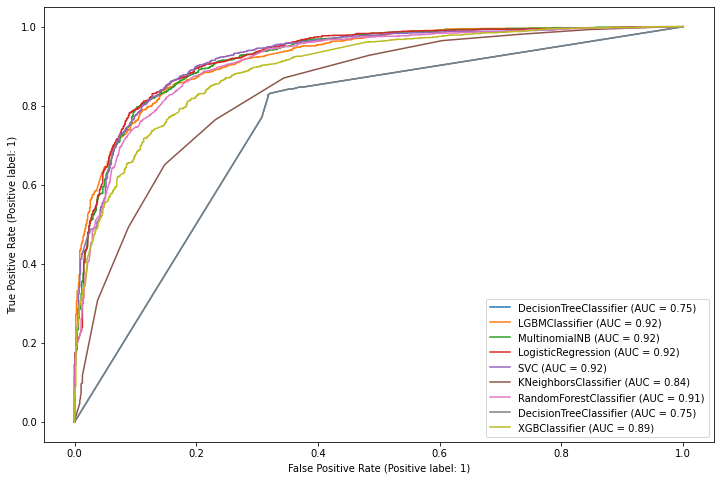

In [ ]:
#ROC curve
from sklearn.metrics import plot_roc_curve,classification_report

disp = plot_roc_curve(dtc, X_test, y_test)
plt.rcParams['figure.figsize'] = (16, 10)
plot_roc_curve(lgbm,X_test, y_test, ax = disp.ax_)
plot_roc_curve(mnb,X_test, y_test, ax = disp.ax_)
plot_roc_curve(lgr,X_test, y_test, ax = disp.ax_)
plot_roc_curve(svm,X_test, y_test, ax = disp.ax_)
plot_roc_curve(knn,X_test, y_test, ax = disp.ax_)
plot_roc_curve(ran,X_test, y_test, ax = disp.ax_) 
plot_roc_curve(dtc,X_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb,X_test, y_test, ax = disp.ax_)

According to the above ROC curve, LGBM, Multinomial NB and Logistic regression are performing good.

###**11.2.3 Evaluation metric - Accuracy, Recall and f1-score**

In [ ]:
models = [['XGboost', XGBClassifier()],
          ['Decision tree', DecisionTreeClassifier()],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['LGBM', lgb.LGBMClassifier()],
          ['Random forest', RandomForestClassifier(n_estimators=90)],
          ['SVM', SVC(random_state=6)],
          ['Multinomial NB' , MultinomialNB()]
          ]



In [ ]:
#Let's create one dataframe which holds the results of the evaluation metric
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

In [ ]:
#let's check once
model_1_data = pd.DataFrame(model_1_data)
model_1_data.drop('Precision',axis=1,inplace=True)
model_1_data

,Name,Train_accuracy,Test_accuracy,Recall,F1_Score
0,XGboost,0.838580,0.825633,0.798299,0.751716
1,Decision tree,0.987676,0.759341,0.693587,0.661007
2,KNN,0.748962,0.717959,0.899642,0.416944
3,Logistic Regression,0.898861,0.849337,0.846348,0.781850
4,LGBM,0.923376,0.844918,0.813737,0.783632
5,Random forest,0.987676,0.848935,0.874488,0.773221
6,SVM,0.968386,0.858578,0.865900,0.793911
7,Multinomial NB,0.841929,0.787063,0.956120,0.609720


Here, we will consider acuracy, recall and F1_score.

###**11.2.4 Models to choose for Hyper-parameter tuning**

In [ ]:
classifiers = [XGBClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=79),LogisticRegression(solver='liblinear'),lgb.LGBMClassifier(),
               RandomForestClassifier(n_estimators=90),SVC(random_state=6),MultinomialNB()]
classifiers_names = ['XGboost','Decision tree','KNN','Logistic Regression','LGBM','Random Forest','SVM','Multinomial NB']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

In [ ]:
diff = np.array(training)-np.array(testing)

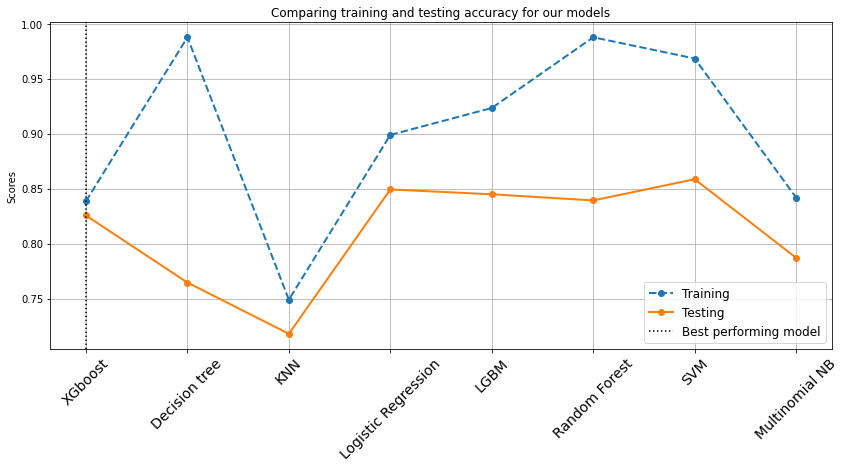

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

We can see that our models are quite overfitting. But if we consider those models with less overfitting and more than 80% accuracy then it would be

(1)XGboost

(2) Logistic regression

(3) LGBM and

(4) SVM

Now we do the hyperparameter tuning for these models and we choose the best amongst these.

## **11.3 Hyper-parameter tuning**



### **11.3.1 Logistic Regression**

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Let's the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid_lgr = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid_lgr, cv = 5)
  
logreg_cv.fit(X_train, y_train)
  
#Let's print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.8492967180174146


In [ ]:
logreg_pred = logreg_cv.predict(X_test)
print(classification_report(y_test,logreg_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8292    0.7503    0.7877       925
           1     0.8602    0.9086    0.8837      1564

    accuracy                         0.8497      2489
   macro avg     0.8447    0.8294    0.8357      2489
weighted avg     0.8486    0.8497    0.8480      2489



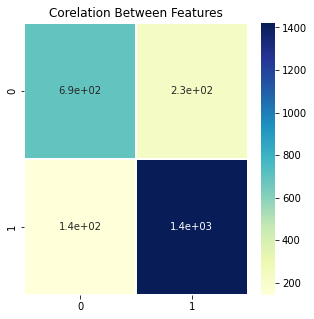

In [ ]:
conf_mat = confusion_matrix(y_test, logreg_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

### **11.3.2 XGBoost Classifier**

In [ ]:
xgbc = XGBClassifier()

from sklearn.model_selection import GridSearchCV
  
#Let's find the best parameters for XGBRegressor by gridsearchcv
xgb_param = {'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
  
# Instantiating Decision Tree classifier
xgb_cv=GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)
    
xgb_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))

#Finding the best fit
xgb_cv.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}
Best score is 0.8365711596189364


XGBClassifier(criterion='entropy', max_depth=15, n_estimators=150)

In [ ]:
xgb_pred = xgb_cv.predict(X_test)
print(classification_report(y_test,xgb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8223    0.7503    0.7846       925
           1     0.8596    0.9041    0.8813      1564

    accuracy                         0.8469      2489
   macro avg     0.8409    0.8272    0.8329      2489
weighted avg     0.8457    0.8469    0.8454      2489



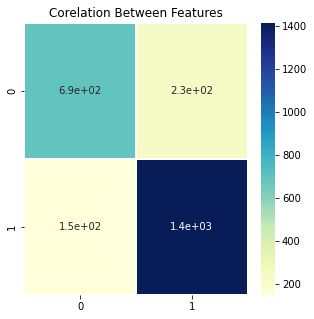

In [ ]:
conf_mat = confusion_matrix(y_test, xgb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

### **11.3.3 Multinomial NB**

In [ ]:
mnb = MultinomialNB()

# grid_params = {'alpha':[1.0], 'class_prior': [True], 'fit_prior': [None] }
grid_params = {'alpha':[1.0,1e-1,1e-2]}
from sklearn.metrics import classification_report

mnb_cv = GridSearchCV(mnb, grid_params, cv=10, scoring='accuracy')

# from sklearn.preprocessing import PowerTransformer
# Data_transformed = PowerTransformer().fit_transform(X_test)
# # mnb_cv.fit(Data_transformed, y_test)
mnb_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(mnb_cv.best_params_))
print("Best score is {}".format(mnb_cv.best_score_))

#let's find the best fit
mnb_cv.best_estimator_

Tuned Decision Tree Parameters: {'alpha': 0.1}
Best score is 0.8287995592737347


MultinomialNB(alpha=0.1)

In [ ]:
mnb_pred = mnb_cv.predict(X_test)
print(classification_report(y_test,mnb_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8850    0.6486    0.7486       925
           1     0.8205    0.9501    0.8806      1564

    accuracy                         0.8381      2489
   macro avg     0.8527    0.7994    0.8146      2489
weighted avg     0.8445    0.8381    0.8315      2489



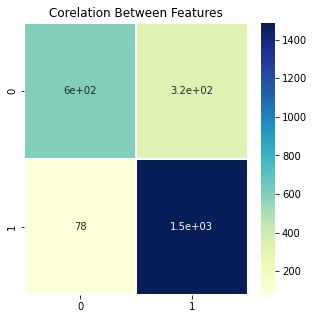

In [ ]:
conf_mat = confusion_matrix(y_test, mnb_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

### **11.3.4 LGBM Classifier**

In [ ]:
lgbc = lgb.LGBMClassifier()

from sklearn.model_selection import GridSearchCV
  
# let's find the best parameters for XGBRegressor by gridsearchcv
lgbm_para={'n_estimators': [100,125,150],'max_depth': [15,20,25]}
  
# Instantiating Decision Tree classifier
lgbm_cv = GridSearchCV(estimator=lgbc ,param_grid=lgbm_para,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)
    
lgbm_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(lgbm_cv.best_params_))
print("Best score is {}".format(lgbm_cv.best_score_))

#Finding the best fit
lgbm_cv.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Tuned Decision Tree Parameters: {'max_depth': 25, 'n_estimators': 150}
Best score is 0.8424641843188271


LGBMClassifier(max_depth=25, n_estimators=150)

In [ ]:
lgbm_pred = lgbm_cv.predict(X_test)
print(classification_report(y_test,lgbm_pred,digits=4))

              precision    recall  f1-score   support

           0     0.8097    0.7589    0.7835       925
           1     0.8625    0.8945    0.8782      1564

    accuracy                         0.8441      2489
   macro avg     0.8361    0.8267    0.8308      2489
weighted avg     0.8429    0.8441    0.8430      2489



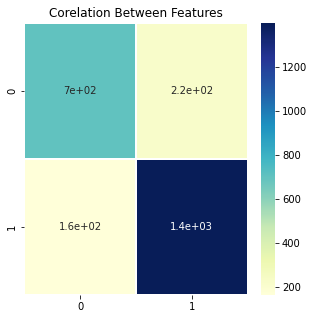

In [ ]:
conf_mat = confusion_matrix(y_test, lgbm_pred)
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

##**11.4 Evaluation Metric - Accuracy, recall and f1 score**

In [ ]:
models = [
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Logistic Regression after Hyperparameter Tuning',GridSearchCV(logreg, param_grid_lgr, cv = 5)],
          ['XGboost', XGBClassifier()],
          ['XGboost after Hyperparameter tuning',GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)],
          ['LGBM', lgb.LGBMClassifier()],
          ['LGBM after Hyperparameter tuning',GridSearchCV(estimator=lgbc ,param_grid=lgbm_para,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)],
          ["Multinomial",MultinomialNB()],
          ['Multinomial after Hyperparameter tuning',GridSearchCV(mnb, grid_params, cv=10, scoring='accuracy')]
         ]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
model_1_data = pd.DataFrame(model_1_data)
model_1_data.drop('Precision',axis=1,inplace=True)
model_1_data

,Name,Train_accuracy,Test_accuracy,Recall,F1_Score
0,Logistic Regression,0.898861,0.849337,0.846348,0.781850
1,Logistic Regression after Hyperparameter Tuning,0.931547,0.849739,0.829152,0.787741
2,XGboost,0.838580,0.825633,0.798299,0.751716
3,XGboost after Hyperparameter tuning,0.957937,0.846926,0.822275,0.784624
4,LGBM,0.923376,0.844918,0.813737,0.783632
5,LGBM after Hyperparameter tuning,0.946149,0.844114,0.809689,0.783482
6,Multinomial,0.841929,0.787063,0.956120,0.609720
7,Multinomial after Hyperparameter tuning,0.915472,0.838088,0.884956,0.748596


We are not seeing that much of change in recall and accuracy. 
After hyper-parameter tuning, we can see that XGBoost model is overfitting.

We can say its been tuned to its perfect fit.

#**STEP 12: Conclusion**

In [ ]:
classifiers = [KNeighborsClassifier(n_neighbors=5), GridSearchCV(logreg, param_grid_lgr, cv = 5),
               GridSearchCV(estimator=xgbc,param_grid=xgb_param,cv=3,scoring='accuracy',verbose=5,n_jobs=-1),
               GridSearchCV(estimator=lgbc ,param_grid=lgbm_para,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)
              ]
classifiers_names = ['KNN','Logistic Regression','XGboost','LGBM']
training,testing = [],[]
for i in classifiers:
    i.fit(X_train, y_train)
    train_y_predicted = i.predict(X_train)
    test_y_predicted = i.predict(X_test)
    tr = round(accuracy_score(y_train,train_y_predicted),4)
    ts = round(accuracy_score(y_test,test_y_predicted),4)
    training.append(tr)
    testing.append(ts)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits


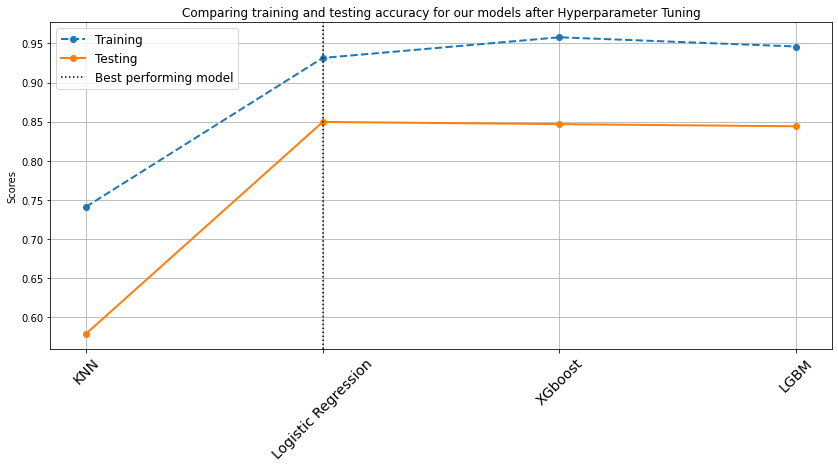

In [ ]:
diff = np.array(training)-np.array(testing)

plt.figure(figsize=(14,6))
plt.plot(range(0,len(classifiers)),training,'--o',lw=2,label='Training')
plt.plot(range(0,len(classifiers)),testing,'-o',lw=2,label='Testing')
plt.xticks(range(0,len(classifiers)), classifiers_names, rotation=45,fontsize=14)
plt.axvline(np.argmin(diff),linestyle=':', color='black', label=f'Best performing model')
plt.ylabel("Scores")
plt.title("Comparing training and testing accuracy for our models after Hyperparameter Tuning")
plt.grid(True)
plt.legend(loc='best',fontsize=12);

That's it! We reached the end of our exercise.Starting with loading the data so far we have done EDA, null values treatment, encoding of categorical columns, feature selection, and then model building.

From the above, We can see that Logistic regression model is working fine as compared to other models. Its accuracy and recall is maximum. Finally our conclusion is that the Logistic regression model is the best suitable model for this sentimental analysis of the project. 